In [1]:
import requests
import numpy as np
import json
import math
import matplotlib.pyplot as plt
from datetime import datetime

In [14]:
int(datetime(2018,10,18,12-7,0,0).timestamp())*1000

1539864000000

In [2]:
def list_string(arr):
    return f"{arr}".replace("'",'"')

In [3]:
start_time = 1539864000000
end_time   = 1539867600000
routes = ["14"]

In [4]:
query = f"""{{
  trynState(agency: "muni", startTime: "{start_time}", endTime: "{end_time}", routes: {list_string(routes)}) {{
    agency
    startTime
    routes {{
      rid
      stops {{
        sid
        name
        lat
        lon
      }}
      routeStates {{
        vtime
        vehicles {{
          vid
          lat
          lon
          heading
        }}
      }}
    }}
  }}
}}
""" # Braces need to be doubled for f-string

In [5]:
query_url = "https://06o8rkohub.execute-api.us-west-2.amazonaws.com/dev/graphql?query="+query
r = requests.get(query_url)

In [6]:
data = json.loads(r.text)
route_14 = data['data']['trynState']['routes'][0]

In [33]:
len(route_14['routeStates'])

244

In [7]:
r14_sort=sorted(route_14['routeStates'], key=lambda x: int(x['vtime']))

In [110]:
set(x['vehicles'][2]['vid'] for x in route_14['routeStates'])

{'5419', '7270', '7279'}

In [8]:
vids = []
for x in r14_sort:
    for y in x['vehicles']:
        vids.append(y['vid'])
vids=sorted(list(set(vids)))
vids

['5413',
 '5419',
 '5430',
 '5442',
 '7207',
 '7209',
 '7211',
 '7213',
 '7227',
 '7238',
 '7247',
 '7257',
 '7265',
 '7270',
 '7273',
 '7279',
 '7280',
 '7290']

In [83]:
lats = []
lons = []
times = []
for x in r14_sort:
    for v in x['vehicles']:
        if v['vid'] == '7279':
            lats.append(v['lat'])
            lons.append(v['lon'])
            times.append(int(x['vtime']))

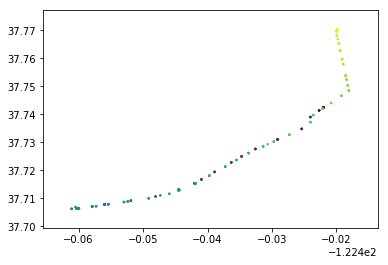

In [84]:
plt.scatter(lons,lats,s=2,c=times)
plt.show()

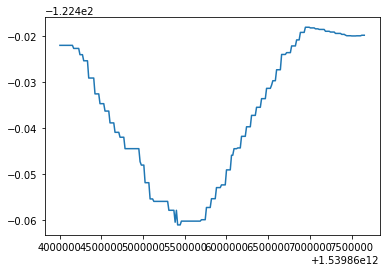

In [92]:
plt.plot(times,lons)
plt.show()

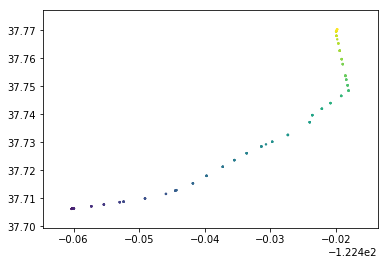

In [93]:
plt.scatter(lons[100:],lats[100:],s=2,c=times[100:])
plt.show()

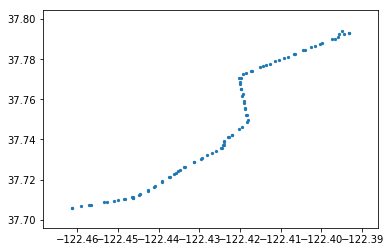

In [108]:
plt.scatter([x['lon'] for x in route_14['stops']],[x['lat'] for x in route_14['stops']],s=5)
plt.show()

In [109]:
def plot_things(route_list, vid):
    lats = []
    lons = []
    times = []
    for x in route_list:
        for v in x['vehicles']:
            if v['vid'] == vid:
                lats.append(v['lat'])
                lons.append(v['lon'])
                times.append(int(x['vtime']))
    plt.scatter(lons,lats,s=2,c=times)
    plt.show()
    plt.plot(times,lons)
    plt.show()
    plt.plot(times,lats)
    plt.show()

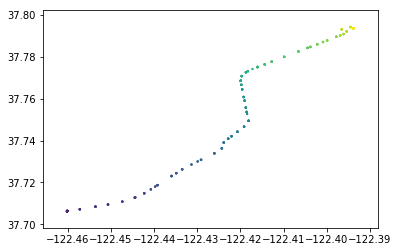

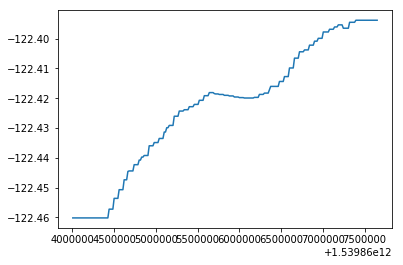

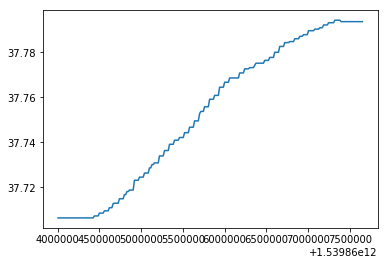

In [154]:
plot_things(r14_sort, vids[14])

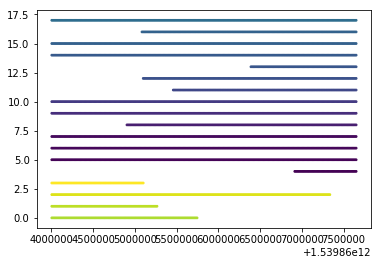

In [150]:
a=[]
b=[]
col=[]
for x in r14_sort:
    for v in x['vehicles']:
        a.append(int(x['vtime']))
        b.append(vids.index(v['vid']))
        col.append(int(v['vid'])%1000)
plt.scatter(a,b,c=col,s=3)
plt.show()

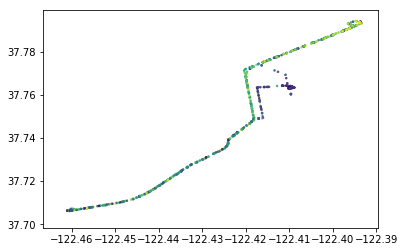

In [169]:
for vid in vids:
    lats1 = []
    lons1 = []
    times1 = []
    for x in r14_sort:
        for v in x['vehicles']:
            if v['vid'] == vid:
                lats1.append(v['lat'])
                lons1.append(v['lon'])
                times1.append(int(x['vtime']))
#     plt.plot(times1,lats1)
    plt.scatter(lons1,lats1,s=2,c=times1,alpha=.3)
plt.show()

In [9]:
# Miles per degree
scale_miles =  {
    'lat_scale' : 69.0,
    'lon_scale' : 54.8
}

In [33]:
def get_dist(loc1,loc2,lat_scale=1,lon_scale=1):
    try:
        return math.hypot((loc1['lat']-loc2['lat'])*lat_scale, (loc1['lon']-loc2['lon'])*lon_scale)
    except:
        return float('nan')

In [26]:
def get_value(arr, key, value):
    return next((x for x in arr if x[key]==value),None)

In [19]:
get_value(r14_sort[10]['vehicles'], 'vid','7279')

{'heading': 207, 'lat': 37.7425, 'lon': -122.42202, 'vid': '7279'}

In [20]:
get_value(r14_sort[15]['vehicles'], 'vid','7279')

{'heading': 195, 'lat': 37.741432, 'lon': -122.422691, 'vid': '7279'}

In [21]:
get_dist(get_value(r14_sort[10]['vehicles'], 'vid','7279'),get_value(r14_sort[15]['vehicles'], 'vid','7279'),**scale_miles)

0.0823565577024222

In [22]:
def get_r14_value(index, vid):
    return get_value(r14_sort[index]['vehicles'],'vid',vid)

In [23]:
get_dist(get_r14_value(10,'7279'),get_r14_value(15,'7279'),**scale_miles)

0.0823565577024222

In [37]:
_vid = vids[15]
for i in range(len(r14_sort)-5):
    print(get_dist(get_r14_value(i,_vid),get_r14_value(i+5,_vid),**scale_miles))

0.0
0.0
0.0
0.0
0.0
0.0
0.0823565577024222
0.0823565577024222
0.0823565577024222
0.0823565577024222
0.0823565577024222
0.1814899727798238
0.1814899727798238
0.1814899727798238
0.48102668385558595
0.48102668385558595
0.3013415659669297
0.3013415659669297
0.618280116847024
0.3312170127824329
0.3312170127824329
0.3312170127824329
0.3312170127824329
0.3011707275634692
0.3011707275634692
0.3011707275634692
0.3011707275634692
0.5179732969456329
0.21759896578939944
0.21759896578939944
0.21759896578939944
0.38913421831392714
0.17156801137528915
0.17156801137528915
0.17156801137528915
0.44495594741211403
0.27338812553637515
0.27338812553637515
0.27338812553637515
0.49034458190022995
0.21695708151880158
0.21695708151880158
0.21695708151880158
0.3307891164354123
0.11383291581086474
0.11383291581086474
0.11383291581086474
0.3226225397659705
0.20981776068224223
0.20981776068224223
0.20981776068224223
0.20981776068224223
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.20758855466139592
0.25582161986154234
0.255821619

In [52]:
def get_avg_speeds_r14(vid,interval=5):
    to_mph = 240/interval # Assumes 15s between data points
    return [get_dist(get_r14_value(i,vid),get_r14_value(i+interval,vid),**scale_miles)*to_mph for i in range(len(r14_sort)-interval)]

In [53]:
get_avg_speeds_r14('7279',10)

[0.0,
 1.9765573848581328,
 1.9765573848581328,
 1.9765573848581328,
 1.9765573848581328,
 1.9765573848581328,
 6.331211004944571,
 6.331211004944571,
 6.331211004944571,
 13.501765477091034,
 13.501765477091034,
 11.544640412534063,
 11.544640412534063,
 19.191110707405937,
 19.191110707405937,
 19.191110707405937,
 14.838722804328576,
 14.838722804328576,
 21.95881842194434,
 15.177183239917603,
 15.177183239917603,
 15.177183239917603,
 20.376870451433632,
 12.431359126695188,
 12.431359126695188,
 12.431359126695188,
 16.53609223862214,
 16.53609223862214,
 9.33922123953425,
 9.33922123953425,
 15.9002246573211,
 15.9002246573211,
 10.678942737890736,
 10.678942737890736,
 15.885885441294247,
 15.885885441294247,
 11.76826996560552,
 11.76826996560552,
 14.500249528928679,
 14.500249528928679,
 7.9389387944498955,
 7.9389387944498955,
 12.933255772022841,
 12.933255772022841,
 7.742940954383291,
 7.742940954383291,
 7.742940954383291,
 7.742940954383291,
 5.0356262563738134,
 5.035

In [54]:
get_avg_speeds_r14(vids[1],10)

[5.969136377466036,
 5.969136377466036,
 13.694313102742498,
 13.694313102742498,
 10.669863669779355,
 10.669863669779355,
 14.512633511691591,
 14.512633511691591,
 11.568103861822324,
 11.572777743034193,
 11.572777743034193,
 11.572777743034193,
 3.8476536495435076,
 3.8476536495435076,
 3.8476536495435076,
 7.914214874521534,
 4.071421478876154,
 4.071421478876154,
 4.071421478876154,
 7.1087299709090725,
 7.1087299709090725,
 9.201591234274328,
 9.201591234274328,
 9.201591234274328,
 9.201591234274328,
 5.134894497853834,
 5.134894497853834,
 7.5210887675019595,
 7.5210887675019595,
 4.479158294964947,
 4.479158294964947,
 7.324721389605248,
 7.324721389605248,
 7.324721389605248,
 7.324721389605248,
 12.558209789110153,
 12.568100963223767,
 10.187986693020962,
 10.187986693020962,
 10.187986693020962,
 10.187986693020962,
 5.272839508432036,
 5.272839508432036,
 7.926401118195093,
 7.926401118195093,
 3.1308311776812783,
 3.1482574626062894,
 3.1482574626062894,
 3.14825746260

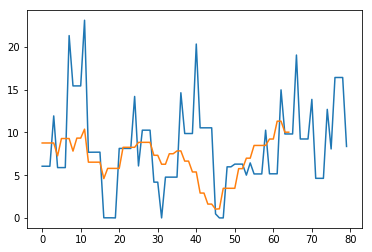

In [174]:
plt.plot(range(len(r14_sort)-5),get_avg_speeds_r14(vids[1],5))
plt.plot(range(len(r14_sort)-20),get_avg_speeds_r14(vids[1],20))
plt.show()

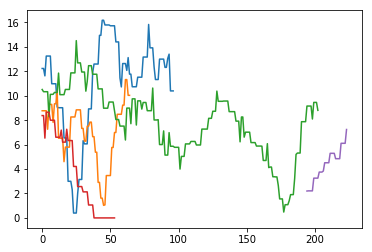

In [107]:
_int=20
for v in vids[:5]:
    plt.plot(range(len(r14_sort)-_int),get_avg_speeds_r14(v,_int))
# plt.savefig('speeds_r14_lines_1.png',dpi=100)
plt.show()

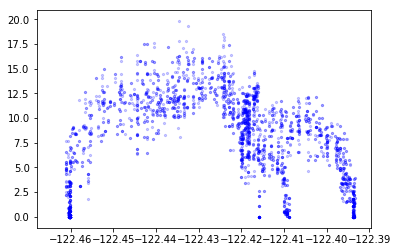

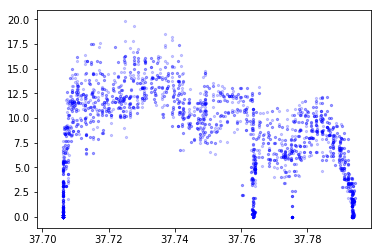

In [177]:
_int=20
for v in vids:
    plt.scatter([(get_r14_value(i+_int//2, v) or {'lon':float('nan')})['lon'] for i in range(len(r14_sort)-_int)],get_avg_speeds_r14(v,_int),s=5,c='blue',alpha=.2)
plt.show()
for v in vids:
    plt.scatter([(get_r14_value(i+_int//2, v) or {'lat':float('nan')})['lat'] for i in range(len(r14_sort)-_int)],get_avg_speeds_r14(v,_int),s=5,c='blue',alpha=.2)
plt.show()

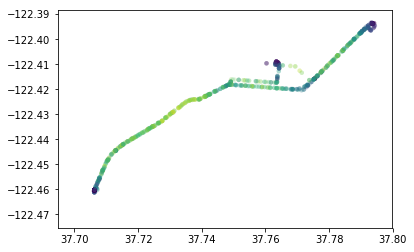

In [180]:
# _vid = vids[1]
_int=20
for _vid in vids:
    _lats=[]
    _lons=[]
    for i in range(len(r14_sort)-_int):
        _bus = get_r14_value(i+_int//2,_vid)
        if _bus:
            _lats.append(_bus['lat'])
            _lons.append(_bus['lon'])
        else:
            _lats.append(float('nan'))
            _lons.append(float('nan'))
    plt.scatter(_lats,_lons,c=get_avg_speeds_r14(_vid,_int),s=20,alpha=.1,linewidths=0)
# plt.savefig('speeds_r14_map_2.png',dpi=100)
plt.show()

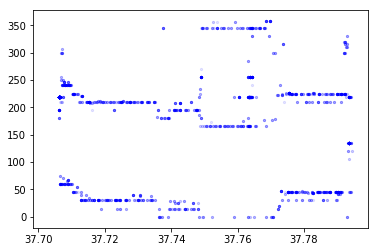

In [170]:
for t in r14_sort:
    _lats=[]
    _lons=[]
    _headings=[]
    _ids=[]
    for v in t['vehicles']:
        _lats.append(v['lat'])
        _lons.append(v['lon'])
        _headings.append(v['heading'])
#         _ids.append(vids.index(v['vid']))
        
#     _time = int(t['vtime'])//1e3
#     plt.scatter([_time for _ in _headings],_headings,s=5,c=_ids,alpha=1)
    plt.scatter(_lats,_headings,s=5,c='blue',alpha=.1)
plt.show()